In [1]:
import nltk
from nltk import sent_tokenize, word_tokenize, pos_tag
import pandas
from nltk.tokenize import sent_tokenize
from nltk.tokenize import RegexpTokenizer


In [2]:
nltk.download('punkt')  # if you tokenize words
# Try the new name first (NLTK ≥ 3.9):
nltk.download('averaged_perceptron_tagger_eng')
# If that doesn't exist (older NLTK), use:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Error loading punkt: <urlopen error [Errno 8] nodename nor
[nltk_data]     servname provided, or not known>
[nltk_data] Error loading averaged_perceptron_tagger_eng: <urlopen
[nltk_data]     error [Errno 8] nodename nor servname provided, or not
[nltk_data]     known>
[nltk_data] Error loading averaged_perceptron_tagger: <urlopen error
[nltk_data]     [Errno 8] nodename nor servname provided, or not
[nltk_data]     known>


False

In [3]:
# Load Dataset
df = pandas.read_csv('theil_econlp-18_data.csv',delimiter='?')
print(df)

                                             Document   Label;
0    For example\, we may record as regulatory asse...      c;
1    In connection with this transaction\, all of o...      c;
2    The warrants were valued using the Black-Schol...      c;
3    In July of 2006\, we entered into an operating...      c;
4    Certain regulatory assets do not result from c...      c;
..                                                 ...     ...
995  The 2000 volumes reflect the impact of additio...      c;
996  The exercise price per share for each such opt...      c;
997  As of June 30\, 2006\, the outstanding mortgag...      c;
998  The General Partner and the Commodity Broker p...      c;
999  Clients pay for inclusion of their interviews ...      c;

[1000 rows x 2 columns]


In [4]:
df.head()

,Document,Label;
0,"For example\, we may record as regulatory asse...",c;
1,"In connection with this transaction\, all of o...",c;
2,The warrants were valued using the Black-Schol...,c;
3,"In July of 2006\, we entered into an operating...",c;
4,Certain regulatory assets do not result from c...,c;


In [5]:
df.columns

Index(['Document ', ' Label;'], dtype='object')

In [6]:
X=df['Document ']
y=df[' Label;']

In [ ]:
X.head(5)

In [7]:
for i in range(len(y)):
    if y[i]=='c;':
        y[i]='1'
    else:
          y[i]='0'

In [8]:
y.describe()

count     1000
unique       2
top          1
freq       846
Name:  Label;, dtype: object

In [9]:
y.value_counts()

 Label;
1    846
0    154
Name: count, dtype: int64

In [10]:
txt=X[1]
print(txt)

In connection with this transaction\, all of our outstanding shares of preferred stock on October 13\, 2010 were converted into shares of our common stock and all of our then outstanding options and warrants were exercised or exchanged for restricted or unrestricted shares of our common stock or were exchanged for unrestricted shares and cash


In [11]:
tokenizer = RegexpTokenizer(r'\w+')
t_word=tokenizer.tokenize(txt)
t_word[:5]

['In', 'connection', 'with', 'this', 'transaction']

In [12]:
# from nltk.tokenize import sent_tokenize, word_tokenize
tokenized_text=sent_tokenize(txt)
print(tokenized_text)

['In connection with this transaction\\, all of our outstanding shares of preferred stock on October 13\\, 2010 were converted into shares of our common stock and all of our then outstanding options and warrants were exercised or exchanged for restricted or unrestricted shares of our common stock or were exchanged for unrestricted shares and cash']


In [13]:
# compare with word_tokenize and sent_tokenize
tokenized_word=word_tokenize(txt)
print(tokenized_word)

['In', 'connection', 'with', 'this', 'transaction\\', ',', 'all', 'of', 'our', 'outstanding', 'shares', 'of', 'preferred', 'stock', 'on', 'October', '13\\', ',', '2010', 'were', 'converted', 'into', 'shares', 'of', 'our', 'common', 'stock', 'and', 'all', 'of', 'our', 'then', 'outstanding', 'options', 'and', 'warrants', 'were', 'exercised', 'or', 'exchanged', 'for', 'restricted', 'or', 'unrestricted', 'shares', 'of', 'our', 'common', 'stock', 'or', 'were', 'exchanged', 'for', 'unrestricted', 'shares', 'and', 'cash']


In [14]:
# Frequency Distribution
from nltk.probability import FreqDist
fdist = FreqDist(tokenized_word)
print(fdist)

<FreqDist with 32 samples and 57 outcomes>


In [15]:
fdist.most_common(2)

[('of', 5), ('our', 4)]

In [16]:
from nltk.corpus import stopwords
stop_words=set(stopwords.words("english"))
print(stop_words)

{'through', 'further', 'yourself', 're', "they've", "weren't", 'because', 'own', "we'd", 'ma', 'd', "i'd", 'on', 'those', 's', 'weren', "haven't", "mustn't", 'do', "she'd", 'than', "that'll", 'be', 'o', 'y', 'what', 'these', 'ours', 'was', 'her', "i'm", 'themselves', 'they', 'here', "mightn't", 'should', 'during', 'will', 'haven', 'wouldn', "you're", 't', 'that', 'with', "shan't", 'my', 'a', "he's", "it'd", 'is', 'at', 'does', 'if', 've', "don't", 'again', 'by', "should've", 'have', 'whom', 'before', 'such', 'doing', "wouldn't", 'each', 'couldn', 'this', 'when', 'i', "couldn't", 'shouldn', 'while', 'against', 'other', 'ourselves', 'has', 'any', 'can', "you'd", 'its', "needn't", 'off', 'not', "she's", 'just', 'm', 'as', 'from', 'out', "hadn't", 'in', 'so', "they'd", "you'll", 'won', 'shan', 'theirs', 'needn', 'all', 'him', 'under', "shouldn't", 'where', 'yourselves', 'very', "it'll", 'after', 'some', 'the', 'wasn', "we're", 'having', 'into', 'for', 'am', 'did', 'below', 'don', 'he', 'up

In [17]:
filtered_sent=[]
for w in t_word:
    if w not in stop_words:
        filtered_sent.append(w)
        #print("Tokenized Sentence:",tokenized_text)
print("Filterd Sentence:",filtered_sent)

Filterd Sentence: ['In', 'connection', 'transaction', 'outstanding', 'shares', 'preferred', 'stock', 'October', '13', '2010', 'converted', 'shares', 'common', 'stock', 'outstanding', 'options', 'warrants', 'exercised', 'exchanged', 'restricted', 'unrestricted', 'shares', 'common', 'stock', 'exchanged', 'unrestricted', 'shares', 'cash']


In [18]:
import nltk
nltk.download('wordnet')

[nltk_data] Error loading wordnet: <urlopen error [Errno 8] nodename
[nltk_data]     nor servname provided, or not known>


False

In [19]:
from nltk.stem.wordnet import WordNetLemmatizer
lem = WordNetLemmatizer()

from nltk.stem.porter import PorterStemmer
stem = PorterStemmer()

word = "flying"
print("Lemmatized Word:",lem.lemmatize(word,"v"))
print("Stemmed Word:",stem.stem(word))

Lemmatized Word: fly
Stemmed Word: fli


### POS-TAG NOUN, PRONOUN, ADJECTIVE, VERB, ADVERBS,

*** This list means NLTK has parsed each word and assigned it a syntactic label (POS tag). ***
For example:

NN / NNS → noun (singular / plural)

JJ → adjective

VBD / VBN → verb (past tense / past participle)

IN → preposition

DT → determiner (“the,” “this,” “all”)

CC → coordinating conjunction (“and,” “or”)

PRP$ → possessive pronoun (“our,” “his”)

This is the standard Penn Treebank POS tagset, which NLTK uses by default.

In [20]:
# POS Tagging
nltk.pos_tag(t_word)

[('In', 'IN'),
 ('connection', 'NN'),
 ('with', 'IN'),
 ('this', 'DT'),
 ('transaction', 'NN'),
 ('all', 'DT'),
 ('of', 'IN'),
 ('our', 'PRP$'),
 ('outstanding', 'JJ'),
 ('shares', 'NNS'),
 ('of', 'IN'),
 ('preferred', 'JJ'),
 ('stock', 'NN'),
 ('on', 'IN'),
 ('October', 'NNP'),
 ('13', 'CD'),
 ('2010', 'CD'),
 ('were', 'VBD'),
 ('converted', 'VBN'),
 ('into', 'IN'),
 ('shares', 'NNS'),
 ('of', 'IN'),
 ('our', 'PRP$'),
 ('common', 'JJ'),
 ('stock', 'NN'),
 ('and', 'CC'),
 ('all', 'DT'),
 ('of', 'IN'),
 ('our', 'PRP$'),
 ('then', 'RB'),
 ('outstanding', 'JJ'),
 ('options', 'NNS'),
 ('and', 'CC'),
 ('warrants', 'NNS'),
 ('were', 'VBD'),
 ('exercised', 'VBN'),
 ('or', 'CC'),
 ('exchanged', 'VBN'),
 ('for', 'IN'),
 ('restricted', 'VBN'),
 ('or', 'CC'),
 ('unrestricted', 'JJ'),
 ('shares', 'NNS'),
 ('of', 'IN'),
 ('our', 'PRP$'),
 ('common', 'JJ'),
 ('stock', 'NN'),
 ('or', 'CC'),
 ('were', 'VBD'),
 ('exchanged', 'VBN'),
 ('for', 'IN'),
 ('unrestricted', 'JJ'),
 ('shares', 'NNS'),
 ('and', 

### BAG of Words

In [21]:
import warnings
warnings.filterwarnings("ignore", message="The parameter 'token_pattern' will not be used since 'tokenizer' is not None")


In [25]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
#tokenizer to remove unwanted elements from out data like symbols and numbers
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(lowercase=True,
                     stop_words='english',
                     ngram_range = (1,1),
                     tokenizer = token.tokenize)
text_counts= cv.fit_transform(X)

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
   text_counts, y, test_size=0.3, random_state=1)

In [27]:

from sklearn.naive_bayes import MultinomialNB

from sklearn import metrics

clf = MultinomialNB().fit(X_train, y_train)
predicted= clf.predict(X_test)
print("Naive Bayes:",metrics.accuracy_score(y_test, predicted))


Naive Bayes: 0.8033333333333333


In [28]:
from sklearn import metrics
# Print accuracy
print("Naive Bayes Accuracy:", metrics.accuracy_score(y_test, predicted))

# Print detailed classification report
print("\nClassification Report:\n")
print(metrics.classification_report(y_test, predicted))

Naive Bayes Accuracy: 0.8033333333333333

Classification Report:

              precision    recall  f1-score   support

           0       0.44      0.45      0.45        53
           1       0.88      0.88      0.88       247

    accuracy                           0.80       300
   macro avg       0.66      0.67      0.66       300
weighted avg       0.80      0.80      0.80       300



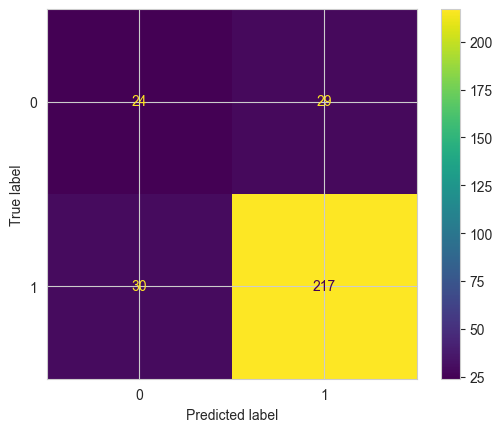

In [29]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test)
plt.show()

#### TF-IDF

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer()
text_tf= tf.fit_transform(X)

In [31]:
text_tf

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 21959 stored elements and shape (1000, 4209)>

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
   text_tf,y, test_size=0.3, random_state=1)

In [33]:
from sklearn.naive_bayes import MultinomialNB

from sklearn import metrics

clf = MultinomialNB().fit(X_train, y_train)
predicted= clf.predict(X_test)
print("Naive Bayes Doğruluk:",metrics.accuracy_score(y_test, predicted))


Naive Bayes Doğruluk: 0.8233333333333334


In [34]:
print("Naive Bayes Accuracy:", metrics.accuracy_score(y_test, predicted))

# Print detailed classification report
print("\nClassification Report:\n")
print(metrics.classification_report(y_test, predicted, zero_division=0))

Naive Bayes Accuracy: 0.8233333333333334

Classification Report:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        53
           1       0.82      1.00      0.90       247

    accuracy                           0.82       300
   macro avg       0.41      0.50      0.45       300
weighted avg       0.68      0.82      0.74       300



In [ ]:
import numpy as np
unique, counts = np.unique(y_train, return_counts=True)
print(dict(zip(unique, counts)))

## Lets fix the imbalanced data with RandomOverSampler
#!pip install imbalanced-learn
The RandomOverSampler (or "random sampler") is a simple but effective technique to fix class imbalance in machine learning datasets — that is, when one class has far fewer samples than others.

Before resampling:
 Class | Count |
|--------|--------|
| 0 | 50 |
| 1 | 250 |

After applying RandomOverSampler:

| Class | Count |
|--------|--------|
| 0 | 250 |
| 1 | 250 |

In [37]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_train_bal, y_train_bal = ros.fit_resample(X_train, y_train)

In [38]:
import numpy as np
unique, counts = np.unique(y_train_bal, return_counts=True)
print(dict(zip(unique, counts)))

{'0': np.int64(599), '1': np.int64(599)}


In [39]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(X_train_bal, y_train_bal)
pred = clf.predict(X_test)

from sklearn import metrics
print("Accuracy:", metrics.accuracy_score(y_test, pred))
print(metrics.classification_report(y_test, pred, zero_division=0))

Accuracy: 0.7433333333333333
              precision    recall  f1-score   support

           0       0.35      0.55      0.43        53
           1       0.89      0.79      0.83       247

    accuracy                           0.74       300
   macro avg       0.62      0.67      0.63       300
weighted avg       0.80      0.74      0.76       300

